#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Temas 1, 2 y 3: Agrupamiento / Clustering con el método K-means, Hierarchical clustering, GMM Models
##### Alumno: Ibarra Ramírez Sergio </font>

### Agrupamiento / Clustering con el método K-means

#### Agrupamiento / Clustering con el método K-means (Implementación de cero en Python)

Se importan librerias necesarias

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('ggplot')

Definimos la data a clasificar y los centroides iniciales 

In [2]:
data = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
C = np.array([[8, 10], [3, 10.5]])

Graficamos la data y los centroides iniciales

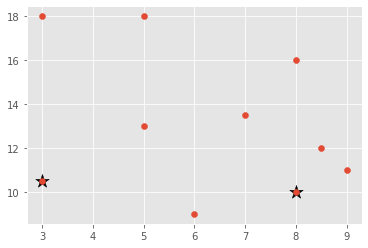

In [3]:
## Grafica de centroides iniciales y la data a clasificar
fig = plt.figure()
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1])

Debemos calcular la distancia de cada punto a cada centroide y definir a que centroide/cluster pertenencen cada uno de los punts

In [5]:
distances = []
clusters = np.zeros(len(data))


#Vamos a definir una función que clacule distancias 

def dist (a,b,ax=1):
    return np.linalg.norm(a-b, axis=ax)

for i in range(len(data)):
    ##Distance es un vector de dos 
    distance = dist(data[i], C)
    distances.append(distance)
    ## Indica 0 si la distance menor es al primero punto o 1 
    cluster = np.argmin(distance)
    clusters[i] = cluster

print(clusters)
distances

[0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

Se observa como clusters es un array de enteros donde 0 - Pertenece al cluster 1 y 1: Pertenece al cluster 2.  Además distances es una tupla de arrays, donde cada array tiene 2 elementos [distancia_al_cluster1,distancia_al_cluster2] y se asigna a cada elemento en data al cluster del que esté a menor distancia 

Ahora, vamos implementar la segunda parte del algoritmo que recalcula los centroides como la media de los puntos asignados a cada centroide

In [15]:
desired_cluster = 0  # Specify the cluster index you want to investigate
points_assigned_to_cluster = [data[i] for i in range(len(data)) if clusters[i] == desired_cluster]
points_assigned_to_cluster

[array([ 8., 10.]),
 array([ 7. , 13.5]),
 array([6., 9.]),
 array([ 9., 11.]),
 array([ 8.5, 12. ]),
 array([ 8., 16.])]

In [6]:
for i in range(len(C)):
    ##Vamos a determinar que puntos pertenencen a cada cluster 
    ## Se hará uso de list comprehensiotn 
    ## Para cada elemento j-esimo dentro de la list data, cada elemento en el rango data
    ## Si el INDEX ese j-esimo elemento dentro de clusters es igual al del i-esimo
    ## elemento iterado en esta list comprehension el punto se agrega a points 
    points = [data[j] for j in range(len(data)) if clusters[j]==i]
    print(points)
    ##Se asigna al centroide determinado
    C[i] = np.mean(points, axis=0)
print(C)

[array([ 8., 10.]), array([ 7. , 13.5]), array([6., 9.]), array([ 9., 11.]), array([ 8.5, 12. ]), array([ 8., 16.])]
[array([ 3. , 10.5]), array([ 5., 18.]), array([ 5., 13.]), array([ 3., 18.])]
[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


Note: [data[j] for j in range(len(data)) if clusters[j] == i] is used to gather the data points that belong to the current cluster C[i]. The list comprehension iterates over the range of indices of the data array, checks if the cluster assignment clusters[j] matches the current cluster index i, and if it does, it includes the corresponding data point data[j] in the points list.

Donde points es una lista de arrelgos con todos los puntos 
Y C[i] es el nuevo centroide para cada cluster

Veamos ahora graficamente como se encuentran nuestros 'nuevos centroides' con respecto a nuestra data

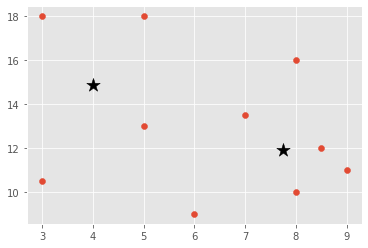

In [20]:
## Grafica de nuevo centroides iniciales y la data a clasificar
fig = plt.figure()
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='k')
plt.scatter(data[:,0], data[:,1])

Se observa claramente como el centroide 'de la izquiera' ahora está mucho más cercano a los puntos superiores.

Y ahora entramos en un ciclo donde debemos re-calcular la distancia de cada punto a cada centroide 'nuevo' y definir a que centroide/cluster 'nuevo' pertenencen cada uno de los puntos y volver a recalcular los centroides como la media de los puntos asignados a él. Este ciclo se repite hasta que los nuevos centroides sean practicamente igual al anterior calculado.

Esto se logrará con un ciclo while que haga la iteración anterior hasta que 
la diferencia en el centroide[i] y el centroide[i-1] sea mejor a un threshold definido, de por ejemplo 0.001. De la siguiente manera: 

prev_C = C.copy()

    if np.linalg.norm(C - prev_C) <= 0.001:
        break

    prev_C = C.copy()

El código completo de la implementación de K-means quedaría entnces como: 

In [21]:
## Calcula la distancia de cada punto con el otro
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initial centroids
prev_C = C.copy()

while True:
    ##Inicializamos arrays de distancias y de clusters
    distances = []
    clusters = np.zeros(len(data))


    ## Para cada punto en el array data
    for i in range(len(data)):
        ## Calcula la distancia del i-esimo punto al centroide C return np.linalg.norm(a - b, axis=ax)
        distance = dist(data[i], C)
        ##Guarda todas esas distancias en un array para cada punto en array de arrays de distancias, llamado distances
        distances.append(distance)
        ## Asig una un cluster para cada distancia, como la minima distancia de cada array
        cluster = np.argmin(distance)
        ## Se guarda cada cluster de cada punti i en el array de clusters 
        clusters[i] = cluster

        ## Para cada punto dentro de nuestros Centroides
    for i in range(len(C)):
        ## Le asigna a cada punto su centroide en caso en que clusters[j] == i  
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        ## El controide es la distancia media de todos los puntos 
        C[i] = np.mean(points, axis=0)



   ### Actualiza los centroides si la difernecia entre sus distancias es mayor a un threshold definido 
    if np.linalg.norm(C - prev_C) <= 0.001:
        break


    ## Atualiza el valor de C[i-1] como el calulado en el respectivo ciclo 
    prev_C = C.copy()

print("Final centroids:")
print(C)


Final centroids:
[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


#### Agrupamiento / Clustering con el método K-means (Implementación con la libreria sklearn)

##### Ahora vamos a implementar el mismo algoritmo de K-medias pero con ayuda de SKLEARN 

Vamos a importar los datos

In [22]:
import pandas as pd
data_k_means_sklearn = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/xclara.csv')
print(data_k_means_sklearn.shape)
data_k_means_sklearn.head(5)

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


Asignamos cada punto sus coordenadas en el plano cartesiano como X1 y X2 y los graficamos

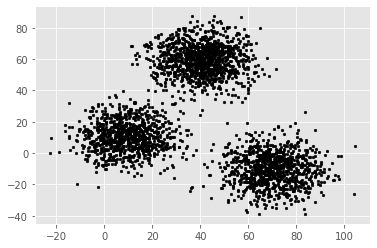

In [23]:
import numpy as np
from matplotlib import pyplot as plt 


x1 = data_k_means_sklearn.V1.values
x2 = data_k_means_sklearn.V2.values
X = np.array(list(zip(x1,x2)))
plt.scatter(x1,x2,c='black', s=7)

Vamos a importar la libreria necesaria, se llama Kmeans 
Vamos a definir el objeto km, entrenarlo con nuestra data y obtener el cluster para cada punto 

In [26]:
from sklearn.cluster import KMeans

## Creamos el objeto km 
km = KMeans(n_clusters=3)

## Se entrena o ajusta el modelo
km = km.fit(X)
## Se guardan las etiquetas de las clases
clusters_asignation_k_means_skelarn = km.predict(X)
clusters_asignation_k_means_skelarn 


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1])

Además se obtienen los Clusters finales 

In [27]:
## Se definen los centroides
C = km.cluster_centers_ 
C

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

Graficamos el resultado del Kmeans

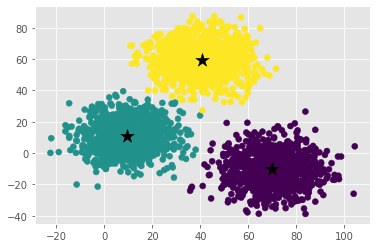

In [28]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='k')

Para justar el hiperparámetro de n_clusters en el modelo K-means se debe hacer el algoritmo para diferentes n_clusters y verificar para cada uno de ellos, una especie de 'error' que sería el cuadrado de la distancia entre los puntos y su respectivo centroide, con el objetivo de encontrar la n_clusters que MINIMICE dicho 'error' o residuo. 
Este método se conoce como 'método del codo' y se puede implementar muy facul con la ayuda de las librerías de Python 

##### Método del codo para evaluación de número óptimo de clusters en K means 

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

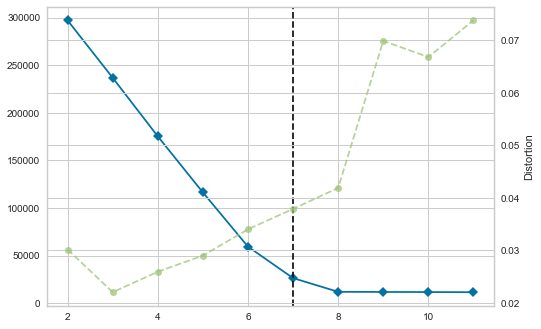

In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Generating a random dataset
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

vis = KElbowVisualizer(KMeans(), k=(2, 12), timings=True)
vis.fit(X)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Comentarios generales sobre el método K-means. 

Ventajas: 
- Permite trabajar con datos de muchas variables 
- Tiene solamente un hiperparámetro a ajustar/definir (n_clusters)

Desventajas: 
- Es muy sensible a la elección de centroides iniciales
- En cada ciclo debe calcular la distancia de cada punto a cada centroide y eso puede generar mucho costo computacional 
- Puede no ser muy bueno si los datos 'no son tan linealmente separables'


### Hierarchical Clustering o clustering jerarquico

#### Hierarchical Clustering (ejemplo 1)

Vamos a importar las librerias necesarias

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Importamos la data necesaria para aplicar el algoritmo de Cluster jerarquico 

In [32]:
url_jerarquico = 'https://bit.ly/2COHM14'
data_jerarquico = pd.read_csv(url_jerarquico)
data_jerarquico.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788


Vamos a normalizar los datos para tener una misma escala 

In [33]:
from numpy.linalg import norm
from sklearn.preprocessing import normalize
data_jerarquico_scaled = normalize(data_jerarquico)
data_jerarquico_scaled

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

Vamos a formar un DataFrame con la data ya 'normalizada'

In [35]:
data_jerarquico_scaled = pd.DataFrame(data_jerarquico_scaled, columns=data_jerarquico.columns)

data_jerarquico_scaled.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494


Vamos a aplicar el modelo jerarquico y graficar el dendograma de clasificaicón y obtener el n_clusters 'óptimo' según el algoritmo scipy.cluster.hierarchy 

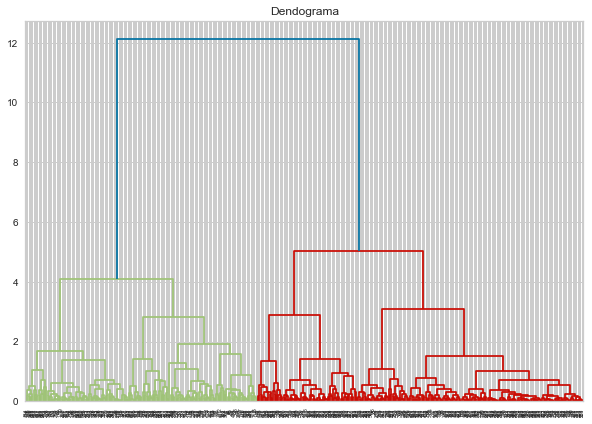

In [36]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dendograma_jerarquico_ejemplo1 = sch.dendrogram(sch.linkage(data_jerarquico_scaled,method='ward'))

Ahora vamos a usar el n_clusters 'óptimo' que se obtuvo del dendograma para asignar a cada uno de nuestros puntos a uno u otro cluster 

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster_jerarquico_ejemplo1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_jerarquico_ejemplo1.fit_predict(data_jerarquico_scaled)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Vamos a graficar un ejemplo del clustering (reducido a dos variables)

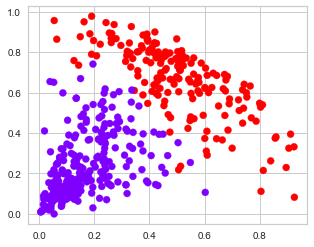

In [38]:
plt.figure(figsize=(5,4))
plt.scatter(data_jerarquico_scaled.Milk, data_jerarquico_scaled.Grocery, c= cluster_jerarquico_ejemplo1.labels_, cmap='rainbow')

#### Hierarchical Clustering (ejemplo 2)

Importamos la data necesaria para aplicar el algoritmo de Cluster jerarquico (ejmeplo2)

In [49]:
dataset_jearquico_ejemplo2 = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv')
dataset_jearquico_ejemplo2.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


Vamos a usar solamente ingreso anual y score como variables para generar nuestros clusters  

In [50]:
X_jearquico_ejemplo2 = dataset_jearquico_ejemplo2.iloc[:,[3,4]].values
X_jearquico_ejemplo2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Vamos a normalizar los datos para tener una misma escala 

In [51]:
from numpy.linalg import norm
from sklearn.preprocessing import normalize
X_jearquico_ejemplo2 = normalize(X_jearquico_ejemplo2)
X_jearquico_ejemplo2

array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.93632918, 0.35112344],
       [0.20344646, 0.97908607],
       [0.39114064, 0.92033092],
       [0.21828984, 0.97588398],
       [0.9486833 , 0.31622777],
       [0.18807227, 0.98215519],
       [0.98776297, 0.15596257],
       [0.25515426, 0.96690036],
       [0.80505584, 0.59319904],
       [0.18847945, 0.98207713],
       [0.8       , 0.6       ],
       [0.25139836, 0.9678837 ],
       [0.83844362, 0.54498835],
       [0.24542187, 0.96941637],
       [0.51449576, 0.85749293],
       [0.30320366, 0.95292578],
       [0.62139471, 0.78349768],
       [0.22848559, 0.97354729],
       [0.56552836, 0.82472885],
       [0.31232107, 0.9499766 ],
       [0.98058068, 0.19611614],
       [0.32399297, 0.94605949],
       [0.89442719, 0.4472136 ],
       [0.32314385, 0.94634986],
       [0.65850461, 0.75257669],
       [0.41716766, 0.90882955],
       [0.68315713, 0.73027141],
       [0.31622777, 0.9486833 ],
       [0.

Vamos a aplicar de nuevo el modelo jerarquico y graficar el dendograma de clasificaicón y obtener el n_clusters 'óptimo' según el algoritmo scipy.cluster.hierarchy 

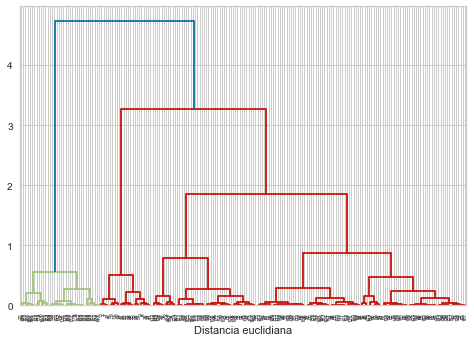

In [52]:
import scipy.cluster.hierarchy as sch 
dendograma_jerarquico_ejemplo2 = sch.dendrogram(sch.linkage(X_jearquico_ejemplo2,method='ward'))
plt.xlabel('Clientes')
plt.xlabel('Distancia euclidiana')
plt.show()

En este caso el número óptimo de clusters parece ser 4 

In [53]:
from sklearn.cluster import AgglomerativeClustering

cluster_jerarquico_ejemplo2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_cluster_jerarquico_ejemplo2 = cluster_jerarquico_ejemplo2.fit_predict(X_jearquico_ejemplo2)
y_cluster_jerarquico_ejemplo2

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 1, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 1, 3, 0, 3, 0, 3, 0, 1, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

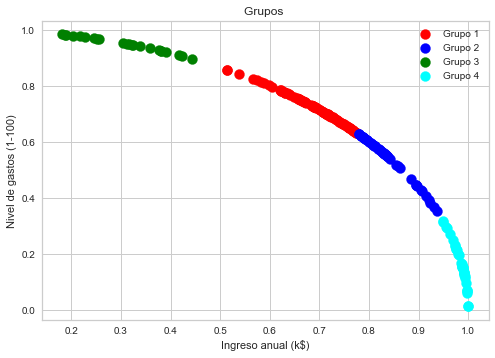

In [54]:
# Graficando los resultados
plt.scatter(X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 0, 0], X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 1, 0], X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 2, 0], X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 3, 0], X_jearquico_ejemplo2[y_cluster_jerarquico_ejemplo2 == 3, 1], s = 100, c = 'cyan', label = 'Grupo 4')

plt.title('Grupos ')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()

#### Comentarios generales sobre el modelo Hierarchical Clustering. 

Ventajas: 
- Es un modelo flexible pues no tiene como tal hiperparámetros a ajustar

Desventajas: 
- Puede generar diferentes resultados dependiendo la función link usada 
- Puede ser muy sensible a valores atipicos 

### Gaussian Mixture Models 

#### Gaussian Mixture Models (ejemplo 1)

Importamos las librerias necesarias

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture 

Vamos a generar los puntos, procurando que se comporten como 'tipo elipsis agregando una desviación standar '

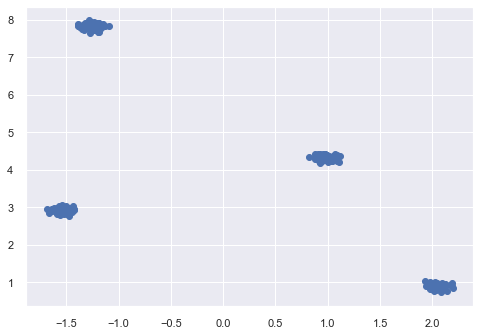

In [81]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.06, random_state=0)
plt.scatter(X[:,0], X[:,1])

Creamos diferentes modelos de Gaussian Mixture cambiando el número de clusters

In [82]:
from pandas.core.common import random_state
n_clusters_GaussianMixture = np.arange(1,21)
models_GaussianMixture = [GaussianMixture (n,covariance_type='full', random_state=0).fit(X) for n in n_clusters]
models_GaussianMixture

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0),
 GaussianMixture(n_components=7, random_state=0),
 GaussianMixture(n_components=8, random_state=0),
 GaussianMixture(n_components=9, random_state=0),
 GaussianMixture(n_components=10, random_state=0),
 GaussianMixture(n_components=11, random_state=0),
 GaussianMixture(n_components=12, random_state=0),
 GaussianMixture(n_components=13, random_state=0),
 GaussianMixture(n_components=14, random_state=0),
 GaussianMixture(n_components=15, random_state=0),
 GaussianMixture(n_components=16, random_state=0),
 GaussianMixture(n_components=17, random_state=0),
 GaussianMixture(n_components=18, random_state=0),
 GaussianMixture(n_components=19, random_state=0),
 GaussianMixture(n_components=20, random_state=0)]

Se usan los criterios BIC y AIC (en una especie de 'método dcel codo') para identificar que n_cluster es el mejor 

Text(0, 0.5, 'AIC and BIC crieteria values')

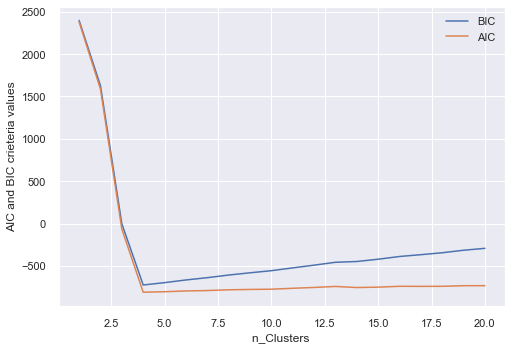

In [83]:
plt.plot(n_clusters_GaussianMixture,[m.bic(X) for m in models_GaussianMixture], label='BIC')
plt.plot(n_clusters_GaussianMixture,[m.aic(X) for m in models_GaussianMixture], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_Clusters ')
plt.ylabel('AIC and BIC crieteria values')

Ahora si vamos a crer como tal nuestros grupos haciendo uso de GaussianMixture y tomando en cuenta el n_clusters 'óptimo'

In [84]:
## Se crea el objeto que guarda el modelo con un número determinado de clusters
gmm_ejemplo1 = GaussianMixture(n_components=4)
gmm_ejemplo1

GaussianMixture(n_components=4)

Vamos a entrenar el modelo GMM (ejemplo1) con nuestras X 

In [85]:
gmm_ejemplo1.fit(X)

GaussianMixture(n_components=4)

Vamos a verificar la probabilidad de pertenencia a cada clase

In [86]:
probabilidades_gmm_ejemplo1 = gmm_ejemplo1.predict_proba(X)
probabilidades_gmm_ejemplo1

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

Se determina para cada punto de X a que cluster de los n_clusterts definidos pertenence (Al que mayor probabilidad tiene, esto equivale a la MAXIMIZACIÓN de la Verosimilitud)

In [63]:
labels_gmm_ejemplo1 = gmm_ejemplo1.predict(X)
labels_gmm_ejemplo1

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3], d

Podemos graficar el resultado del cluster 

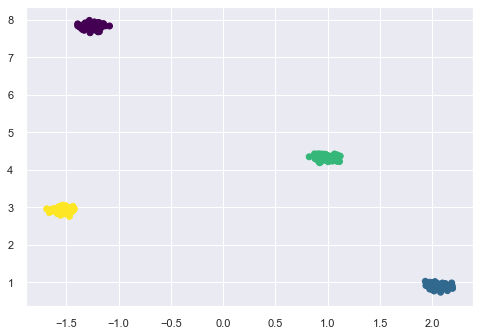

In [64]:
plt.scatter(X[:,0],X[:,1], c=labels_gmm_ejemplo1,cmap='viridis')

#### Gaussian Mixture Models (ejemplo 2)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture 

Vamos a importar la data para aplicar el ejemplo de GaussianMixture ejemplo2 

In [65]:
X_train_GaussianMixture_ejemplo2 = np.load('data.npy')
X_train_GaussianMixture_ejemplo2.shape

(200, 2)

Vamos a graficar nuestra data a agrupar 

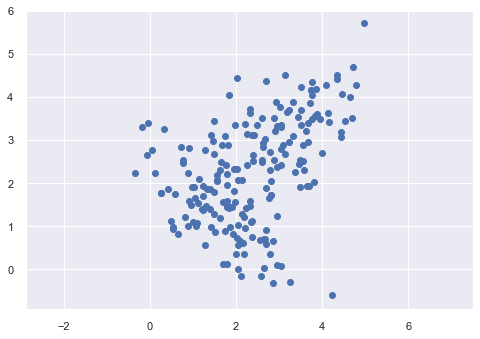

In [66]:
plt.scatter(X_train_GaussianMixture_ejemplo2[:,0], X_train_GaussianMixture_ejemplo2[:,1])
plt.axis('equal')
plt.show()

Creamos y entrenamos el modelo gmm del ejemplo 2 

In [74]:
## Se crea el objeto que guarda el modelo con un número determinado de clusters
gmm_ejemplo2 = GaussianMixture(n_components=2)

gmm_ejemplo2.fit(X_train_GaussianMixture_ejemplo2)

GaussianMixture(n_components=2)

Podemos obtener medias y covarianzas del modelo gmm entrenado

In [75]:
print('Medias: \n', gmm_ejemplo2.means_)
print('Covariances: \n', gmm_ejemplo2.covariances_)

Medias: 
 [[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]
Covariances: 
 [[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


Vamos a verificar la probabilidad de pertenencia a cada clase

In [87]:
probabilidades_gmm_ejemplo2 = gmm_ejemplo2.predict_proba(X_train_GaussianMixture_ejemplo2)
probabilidades_gmm_ejemplo2

array([[1.18437804e-02, 9.88156220e-01],
       [5.81052982e-02, 9.41894702e-01],
       [5.02130401e-06, 9.99994979e-01],
       [8.70435001e-01, 1.29564999e-01],
       [2.15783623e-07, 9.99999784e-01],
       [2.66478525e-07, 9.99999734e-01],
       [5.38404978e-03, 9.94615950e-01],
       [1.15562064e-16, 1.00000000e+00],
       [5.38761219e-11, 1.00000000e+00],
       [6.95143494e-10, 9.99999999e-01],
       [8.39442807e-01, 1.60557193e-01],
       [4.37084708e-04, 9.99562915e-01],
       [7.33794636e-08, 9.99999927e-01],
       [5.19410968e-12, 1.00000000e+00],
       [3.55298540e-08, 9.99999964e-01],
       [8.03326942e-08, 9.99999920e-01],
       [1.19542131e-04, 9.99880458e-01],
       [2.56191319e-01, 7.43808681e-01],
       [4.10919082e-03, 9.95890809e-01],
       [2.16809639e-13, 1.00000000e+00],
       [7.36761425e-02, 9.26323858e-01],
       [2.20763910e-05, 9.99977924e-01],
       [1.63808705e-14, 1.00000000e+00],
       [2.97699643e-07, 9.99999702e-01],
       [1.183988

Se determina para cada punto de X a que cluster de los n_clusterts definidos pertenence (Al que mayor probabilidad tiene, esto equivale a la MAXIMIZACIÓN de la Verosimilitud)

In [88]:
labels_gmm_ejemplo2 = gmm_ejemplo2.predict(X_train_GaussianMixture_ejemplo2)
labels_gmm_ejemplo2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Vamos a graficar el resultado del GaussianMixture donde se muestra la media y varianza de los clusters formados 

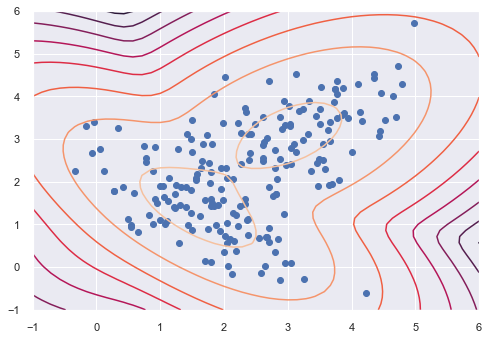

In [78]:
### Vamos a generar una maya de puntos
X,Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))

### Vamos a generar una maya de puntos
XX = np.array([X.ravel(), Y.ravel()]).T
##Puntos de X e Y pegados como si fuera 1 dimensión 
Z = gmm_ejemplo2.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X,Y,Z)
plt.scatter(X_train_GaussianMixture_ejemplo2[:,0], X_train_GaussianMixture_ejemplo2[:,1])
plt.show()

#### Comentarios generales sobre el modelo Hierarchical Clustering. 

Ventajas: 
- Solamente tiene 1 parámetro a ajustar que es el n_components
- Permite hacer agrupamientos no 'tan lineales o esfericos' 
sino con formas más 'ovoideas e irregulares'

Desventajas: 

- Suele encontrar puntos óptimos muy locales y no ser 'tan bueno' con óptimos globales